In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9.5, 6]

# Load Test Data

In [2]:
# Depth Image
depth = np.load('data/depth.npy')
# Camera Intrinsics
K = np.load('data/camera_intrinsics.npy')

# Compute Normals

In [3]:
from range_image_proc.normals import compute_normals, disp_normals, create_normal_legend, AVERAGE_3D_GRADIENT

# Metric to Depth Image Ratio
depth_factor = 1
# Normal Computation Method
method = AVERAGE_3D_GRADIENT
# Max Depth Change
depth_change_factor = 0.02
# Normal Computation Window Size
smoothing_size = 3

normals = compute_normals(depth, K[0,0], K[1,1], K[0,2], K[1,2], 
                          depth_factor = depth_factor,
                          method = method,
                          depth_change_factor = depth_change_factor,
                          smoothing_size=smoothing_size)

# Display Normals

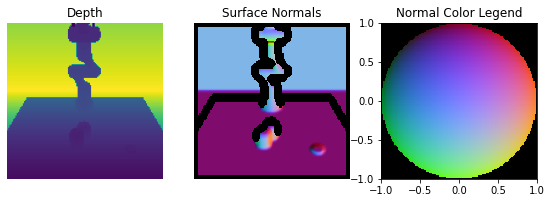

In [4]:
# Depth Data
ax = plt.subplot(131)
ax.imshow(depth)
ax.title.set_text('Depth')
ax.axis('off')

# Colorized Surface Normals
ax = plt.subplot(132)
ax.imshow(disp_normals(normals))
ax.title.set_text('Surface Normals')
ax.axis('off')

# Surface Normal Color Legend
ax = plt.subplot(133)
ax.imshow(disp_normals(create_normal_legend(128)), interpolation='none', extent=[-1,1,-1,1])
ax.title.set_text('Normal Color Legend')

plt.show()